In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
masses_data = pd.read_csv('diabetes.csv')
masses_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
masses_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
masses_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0:-  500
1:-  268


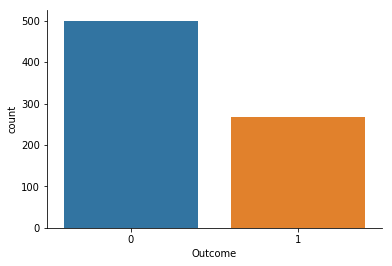

In [42]:
ax=sns.countplot(masses_data['Outcome'], label = 'Count')
B, M = masses_data['Outcome'].value_counts()
print ('0:- ', B)
print ('1:- ', M)

sns.despine()

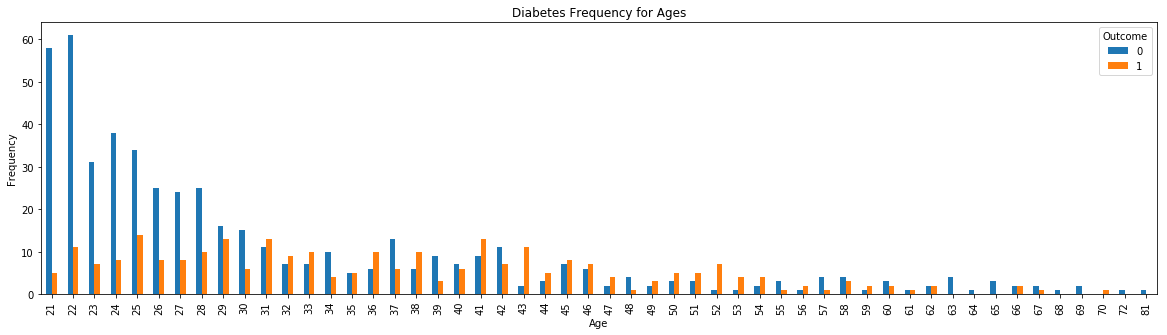

In [10]:
pd.crosstab(masses_data.Age,masses_data.Outcome).plot(kind="bar",figsize=(20,5))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

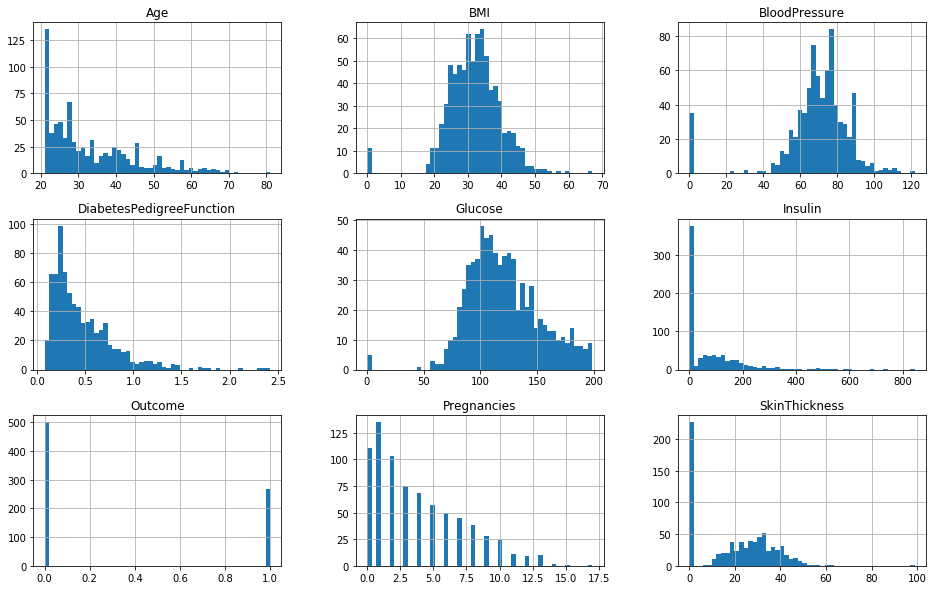

In [11]:
import matplotlib.pyplot as plt
masses_data.hist(bins=50,figsize=(16,10))
plt.show

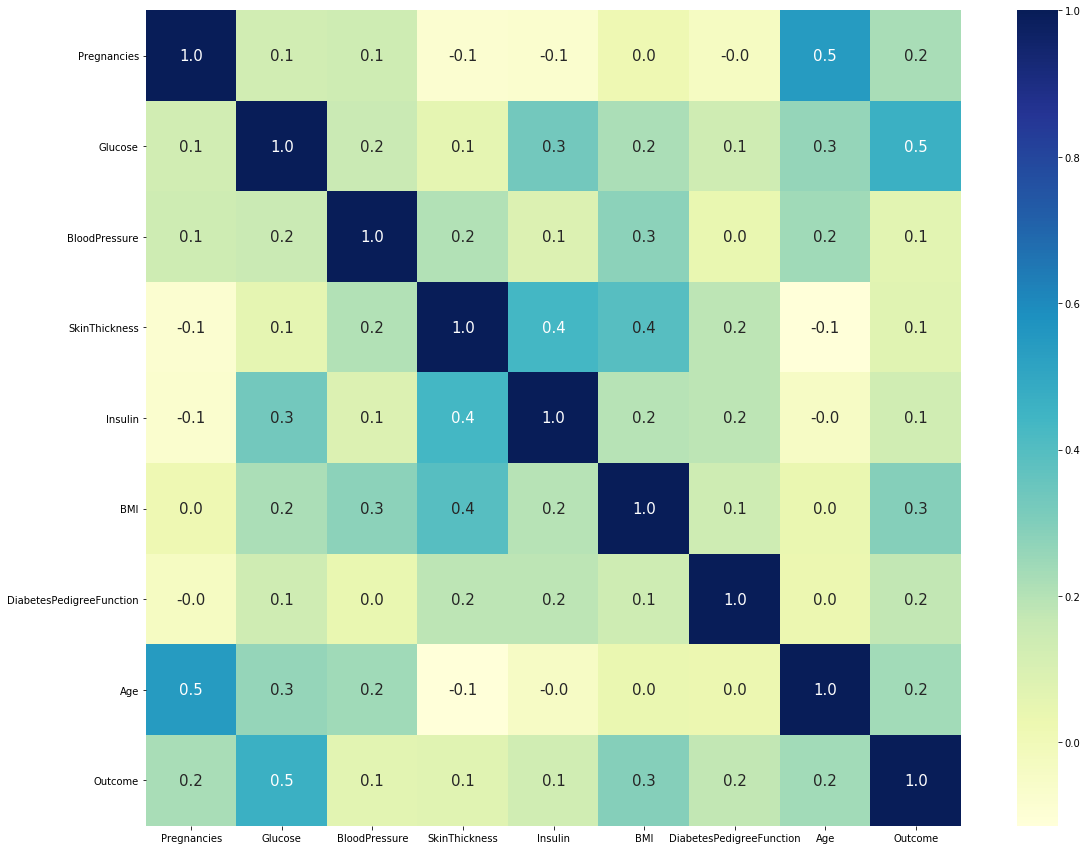

In [12]:
da=masses_data.corr()
da.shape
plt.figure(figsize=(20,15))
sns.heatmap(da, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

In [16]:
all_features = masses_data[['Pregnancies', 'Glucose',
                             'BloodPressure', 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']].values


all_classes = masses_data['Outcome'].values

feature_names = ['Pregnancies', 'Glucose',
                'BloodPressure', 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']

all_features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

X_train, X_test, y_train, y_test= train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

Accuracy is :  72.39583333333334


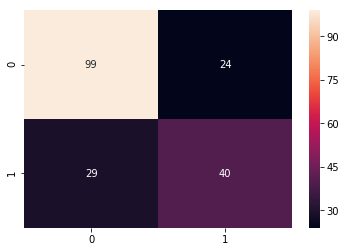

In [34]:
clf_df = DecisionTreeClassifier().fit(X_train,y_train)

ac = accuracy_score(y_test,clf_df.predict(X_test))
print('Accuracy is : ',ac*100)

cm = confusion_matrix(y_test,clf_df.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')

Accuracy is :  79.6875


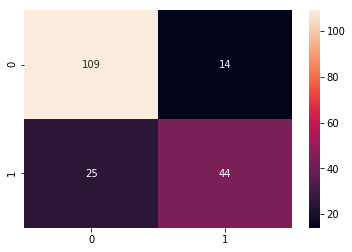

In [36]:
clf_df = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

ac = accuracy_score(y_test,clf_df.predict(X_test))
print('Accuracy is : ',ac*100)

cm = confusion_matrix(y_test,clf_df.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')

Accuracy is :  77.60416666666666


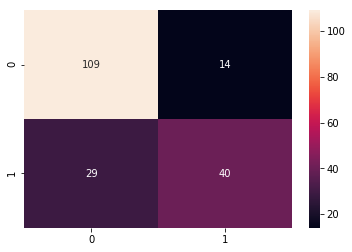

In [37]:
from sklearn.linear_model import LogisticRegression

clf_df = LogisticRegression().fit(X_train,y_train)
ac = accuracy_score(y_test,clf_df.predict(X_test))
print('Accuracy is : ',ac*100)

cm = confusion_matrix(y_test,clf_df.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')

Accuracy is :  28.125


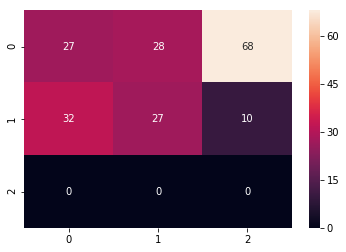

In [54]:
from sklearn import cluster

k=3
kmeans = cluster.KMeans(n_clusters=k)

clf_df = kmeans.fit(X_train,y_train)
ac = accuracy_score(y_test,clf_df.predict(X_test))
print('Accuracy is : ',ac*100)

cm = confusion_matrix(y_test,clf_df.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')